# Astro-19 Final

 ### Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sep

### Load the f105w image

In [35]:
file_path_f105w = '/Users/rowanmarquez/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'
hdul_f105w = fits.open(file_path_f105w)
data_f105w = hdul_f105w[0].data

### Subtract the background

In [36]:
if data_f105w.dtype.byteorder not in ('=', '|'):
    data_f105w = data_f105w.byteswap().newbyteorder()
bkg_f105w = sep.Background(data_f105w)
data_sub_f105w = data_f105w - bkg_f105w

### Object Detection

In [37]:
objects_f105w = sep.extract(data_sub_f105w, 1.5, err=bkg_f105w.globalrms)

### Find sources

In [38]:
num_sources_f105w = len(objects_f105w)
print(f"Number of sources found: {num_sources_f105w}")

Number of sources found: 8640


### Histogram Plot

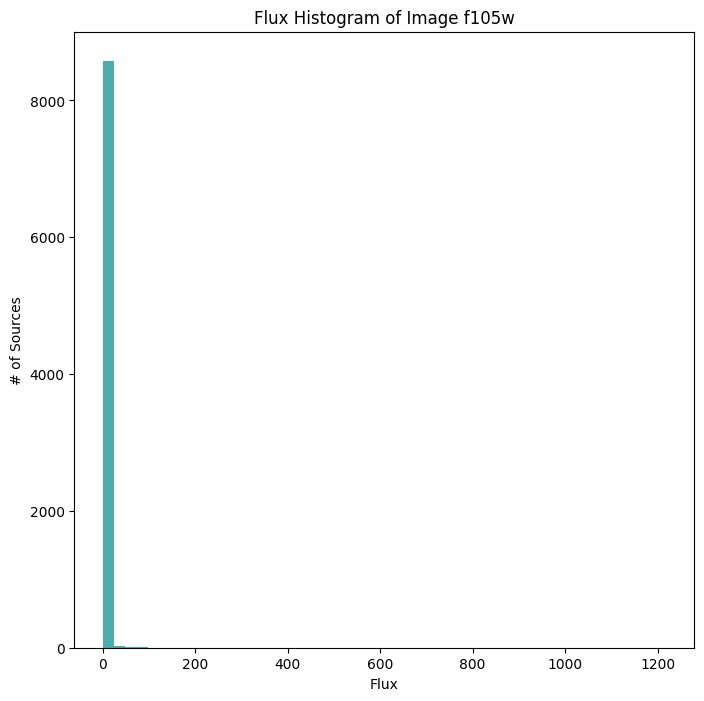

In [39]:
fluxes_f105w = objects_f105w['flux']

plt.figure(figsize=(8,8))
plt.hist(fluxes_f105w, bins=50, color='darkcyan', alpha=0.7)
plt.xlabel('Flux')
plt.ylabel('# of Sources')
plt.title('Flux Histogram of Image f105w')
plt.show()

### Find the mean, median, and standard deviation of the data set

In [40]:
mean_flux_f105w = np.mean(fluxes_f105w)
median_flux_f105w = np.median(fluxes_f105w)
std_flux_f105w = np.std(fluxes_f105w)

print(f"Mean Flux: {mean_flux_f105w}")
print(f"Median Flux: {median_flux_f105w}")
print(f"Standard Deviation Flux: {std_flux_f105w}")

Mean Flux: 1.1726778032743217
Median Flux: 0.034888697788119316
Standard Deviation Flux: 17.547420912246842


### Find outlier and its coordinates

In [41]:
max_flux_index = np.argmax(fluxes_f105w)
max_flux = fluxes_f105w[max_flux_index]
max_flux_x, max_flux_y = objects_f105w['x'][max_flux_index], objects_f105w['y'][max_flux_index]

print(f"Largest outlier flux: {max_flux}")
print(f"Largest outlier coordinates: ({max_flux_x}, {max_flux_y})")

Largest outlier flux: 1218.3980712890625
Largest outlier coordinates: (1914.2549094883857, 1134.3164850742164)


### Outlier standard deviation

In [42]:
std_away_from_mean = (max_flux - mean_flux_f105w) / std_flux_f105w
print(f"The largest outlier is {std_away_from_mean} standard deviations away from the mean.")

The largest outlier is 69.36776632720151 standard deviations away from the mean.


### Load in 125w and 160w

In [43]:
file_path_f125w = '/Users/rowanmarquez/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits'
file_path_f160w = '/Users/rowanmarquez/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits'

hdul_f125w = fits.open(file_path_f125w)
hdul_f160w = fits.open(file_path_f160w)

# gather data:
data_f125w = hdul_f125w[0].data
data_f160w = hdul_f160w[0].data

### False image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


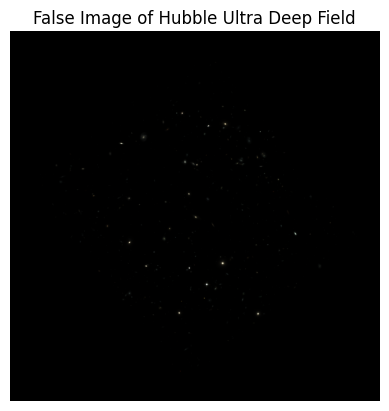

In [44]:
rgb_image = np.stack([data_f160w, data_f125w, data_f105w], axis=-1)

plt.imshow(rgb_image, origin='lower')
plt.title('False Image of Hubble Ultra Deep Field')
plt.axis('off')
plt.savefig('false_UDF.png')
plt.show()